In [34]:
#Project (week 1)
#Titanic is undirected and weighted
#Nodes are characters. Links represent a same-scene appearance between two characters
# in the movie, and the weight gives the number of same-scene appearance.
#a) Pick a social network among the one proposed on luiss.learn
#b) Implement it in Python.
#c) Draw the graph
#d) Compute the number of nodes,edges, average degree and the density. Comment.
#Be careful if the network that you have picked is directed or not.
# It should contain an introduction (around 250 words), a conclusion (around 250 words) and, for each question, explanations/analysis (100-150 words).


In [35]:
import networkx as nx   
import matplotlib.pyplot as plt
import numpy as np
import csv

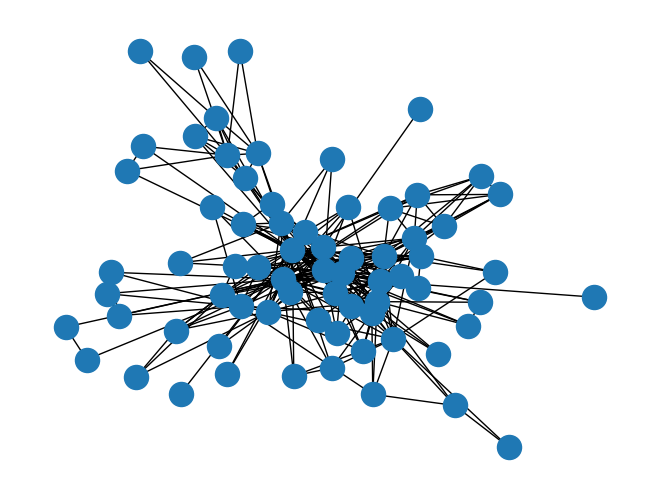

In [36]:
G=nx.Graph()
with open('Graph/nodes.csv', newline='') as nodes_file:
    nodes_reader = csv.DictReader(nodes_file)
    for row in nodes_reader:
        node_id = row['Id']
        label = row['Label']
        movie_id = row['movie_id']
        component_number = row['componentnumber']
        modularity_class = row['modularity_class']
        G.add_node(node_id, label=label, movie_id=movie_id, component_number=component_number, modularity_class=modularity_class)

# Read edges from the 'edges.csv' file
with open('Graph/edges.csv', newline='') as edges_file:
    edges_reader = csv.DictReader(edges_file)
    for row in edges_reader:
        source = row['Source']
        target = row['Target']
        weight = float(row['Weight'])
        edge_type = row['Type']
        edge_id = row['Id']
        edge_label = row['Label']
        movie_id = row['movie_id']  
        G.add_edge(source, target, weight=weight, edge_type=edge_type, edge_id=edge_id, edge_label=edge_label, movie_id=movie_id)

#show the graph with the weights
nx.draw(G)


In [37]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

Number of nodes:  70


In [38]:
#number of edges
print("Number of edges: ", G.number_of_edges())

Number of edges:  299


In [39]:
#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

Average degree:  8.542857142857143


In [40]:
#density
print("Density: ", nx.density(G))

Density:  0.12380952380952381


In [41]:
#Week 2
#While considering the largest component of your network. Depending on what you prefer/seems
#more relevant in your graph,
#a) Compute Average distance and Diameter,
#b) Improve the function computing the inverse distance function.
#Or
#a’) Compute Average clustering and Transitivity number,
#b’) Implement a function computing the transitivity using basic function of networkx

In [42]:
#compute average clustering
print("Average clustering: ", nx.average_clustering(G))

Average clustering:  0.7436551486762099


In [45]:
#compute transitivity
def transitivity(G):
    triangles = 0
    for node in G:
        neighbors = set(G[node]) - {node}
        for n1 in neighbors:
            for n2 in neighbors:
                if n1 in G[n2]:
                    triangles += 1
    return triangles / len(G)
print("Transitivity: ", transitivity(G))

Transitivity:  53.31428571428572
